In [1]:
#%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
import pandas as pd
import numpy as np
import requests
import json
import time
import gmaps
from ipywidgets.embed import embed_minimal_html

# Google API Key
from config import gkey

In [3]:
# Save file path to variable RG path:
#countypop = "Final_Code/Census_Data/County Population.csv"
#census = "Final_Code/Census_Data/ACS_17_5YR_Counties.csv"
#countylatlon = "CountyLatLon.csv"

In [4]:
#Final file location in repo:
countypop = "Census_Data/County Population.csv"
census = "Census_Data/ACS_17_5YR_Counties.csv"
countylatlon = "Census_Data/CountyLatLon.csv"

In [5]:
# County Census for 2012 and 2017
countypop_df = pd.read_csv(countypop)
countypop_df.head()

,County,Total Population
0,"Allen County, Kansas",12519
1,"Anderson County, Kansas",7833
2,"Atchison County, Kansas",16332
3,"Barber County, Kansas",4586
4,"Barton County, Kansas",26476


In [6]:
# Find the median for the Kansas counties in 2012 and 2017
mid = countypop_df.median()
mid

Total Population    6915.0
dtype: float64

In [7]:
# Use numpy to create quartiles for the 2017 Kansas counties population
q1 = np.percentile(countypop_df["Total Population"], 30)
q2 = np.percentile(countypop_df["Total Population"], 60)
q3 = np.percentile(countypop_df["Total Population"], 80)
#q4 = np.percentile(countypop_df["2017"], 80)

print (f"Q1= {q1}, Q2= {q2}, Q3= {q3}")

Q1= 4083.7999999999997, Q2= 9584.6, Q3= 26918.600000000006


In [8]:
# Create the bins for the size of 2017 Kansas counties
bins = [0, 10000, 20000, 100000, 1000000]

# Create the names for the four bins
group_labels = ["rural", "suburb", "urban", "metro"]
countypop_df["County Type"] = pd.cut(countypop_df["Total Population"], bins, right=True, labels=group_labels, include_lowest=True)
totalcountypop_df = countypop_df[["County", "Total Population", "County Type"]]
totalcountypop_df.head()

,County,Total Population,County Type
0,"Allen County, Kansas",12519,suburb
1,"Anderson County, Kansas",7833,rural
2,"Atchison County, Kansas",16332,suburb
3,"Barber County, Kansas",4586,rural
4,"Barton County, Kansas",26476,urban


In [9]:
# Read with Pandas the Education census data
census_df = pd.read_csv(census)
census_df.head()

,County,25+Population,Total Male Population,Total Female Population,"DNU: Total 18-24, Non-grad","DNU: M Total 18-24, Non-grad","DNU: F Total 18-24, Non-grad","DNU: Total 18-24, HS","DNU: M Total 18-24, HS","DNU: F Total 18-24, HS",...,Female Median Earning HS,Total Median Earning Assoc,Male Median Earning Assoc,Female Median Earning Assoc,Total Median Earning Bach,Male Median Earning Bach,Female Median Earning Bach,Total Median Earning Grad,Male Median Earning Grad,Female Median Earning Grad
0,"Allen County, Kansas",1161,616,545,76,57,19,399,231,168,...,19715.0,28008,36058,22031.0,39116,47917.0,36612.0,52315.0,60159,47750
1,"Anderson County, Kansas",517,272,245,58,13,45,169,151,18,...,14167.0,25705,30167,22178.0,37083,37849.0,27361.0,40967.0,NaN,41321
2,"Atchison County, Kansas",2449,1188,1261,147,93,54,668,433,235,...,19472.0,24798,39074,18268.0,42221,67500.0,40654.0,49211.0,65234,43368
3,"Barber County, Kansas",319,163,156,98,65,33,86,51,35,...,15924.0,30550,47143,18750.0,40662,41250.0,40481.0,62159.0,75341,48824
4,"Barton County, Kansas",2287,1150,1137,344,190,154,685,372,313,...,20872.0,33825,42432,26941.0,41098,50278.0,33598.0,53445.0,55000,51394


In [10]:
# Combine the data into a single dataset the Education census data with the 2017 Kansas counties population bins
census_pop_merge_df = pd.merge(census_df, totalcountypop_df, on="County")
census_pop_merge_df.head()

,County,25+Population,Total Male Population,Total Female Population,"DNU: Total 18-24, Non-grad","DNU: M Total 18-24, Non-grad","DNU: F Total 18-24, Non-grad","DNU: Total 18-24, HS","DNU: M Total 18-24, HS","DNU: F Total 18-24, HS",...,Male Median Earning Assoc,Female Median Earning Assoc,Total Median Earning Bach,Male Median Earning Bach,Female Median Earning Bach,Total Median Earning Grad,Male Median Earning Grad,Female Median Earning Grad,Total Population,County Type
0,"Allen County, Kansas",1161,616,545,76,57,19,399,231,168,...,36058,22031.0,39116,47917.0,36612.0,52315.0,60159,47750,12519,suburb
1,"Anderson County, Kansas",517,272,245,58,13,45,169,151,18,...,30167,22178.0,37083,37849.0,27361.0,40967.0,NaN,41321,7833,rural
2,"Atchison County, Kansas",2449,1188,1261,147,93,54,668,433,235,...,39074,18268.0,42221,67500.0,40654.0,49211.0,65234,43368,16332,suburb
3,"Barber County, Kansas",319,163,156,98,65,33,86,51,35,...,47143,18750.0,40662,41250.0,40481.0,62159.0,75341,48824,4586,rural
4,"Barton County, Kansas",2287,1150,1137,344,190,154,685,372,313,...,42432,26941.0,41098,50278.0,33598.0,53445.0,55000,51394,26476,urban


In [11]:
countylatlon_df = pd.read_csv(countylatlon, thousands=',')
countylatlon_df.head()

,County,State,County2,Latitude,Longitude,Population
0,"Allen County, Kansas",Kansas,Allen,37.8586,-95.2750,13371
1,"Anderson County, Kansas",Kansas,Anderson,38.2210,-95.2293,8102
2,"Atchison County, Kansas",Kansas,Atchison,39.5159,-95.2915,16924
3,"Barber County, Kansas",Kansas,Barber,37.2369,-98.6240,4861
4,"Barton County, Kansas",Kansas,Barton,38.4829,-98.7911,27674


In [12]:
countylatlon2_df = countylatlon_df[["County", "Latitude", "Longitude"]]
countylatlon2_df.head()

,County,Latitude,Longitude
0,"Allen County, Kansas",37.8586,-95.2750
1,"Anderson County, Kansas",38.2210,-95.2293
2,"Atchison County, Kansas",39.5159,-95.2915
3,"Barber County, Kansas",37.2369,-98.6240
4,"Barton County, Kansas",38.4829,-98.7911


In [13]:
# Combine the data into a single dataset the Education census data with the 2017 Kansas counties population bins
census_pop_merge2_df = pd.merge(census_pop_merge_df, countylatlon2_df, on="County")
census_pop_merge2_df.head()

,County,25+Population,Total Male Population,Total Female Population,"DNU: Total 18-24, Non-grad","DNU: M Total 18-24, Non-grad","DNU: F Total 18-24, Non-grad","DNU: Total 18-24, HS","DNU: M Total 18-24, HS","DNU: F Total 18-24, HS",...,Total Median Earning Bach,Male Median Earning Bach,Female Median Earning Bach,Total Median Earning Grad,Male Median Earning Grad,Female Median Earning Grad,Total Population,County Type,Latitude,Longitude
0,"Allen County, Kansas",1161,616,545,76,57,19,399,231,168,...,39116,47917.0,36612.0,52315.0,60159,47750,12519,suburb,37.8586,-95.2750
1,"Anderson County, Kansas",517,272,245,58,13,45,169,151,18,...,37083,37849.0,27361.0,40967.0,NaN,41321,7833,rural,38.2210,-95.2293
2,"Atchison County, Kansas",2449,1188,1261,147,93,54,668,433,235,...,42221,67500.0,40654.0,49211.0,65234,43368,16332,suburb,39.5159,-95.2915
3,"Barber County, Kansas",319,163,156,98,65,33,86,51,35,...,40662,41250.0,40481.0,62159.0,75341,48824,4586,rural,37.2369,-98.6240
4,"Barton County, Kansas",2287,1150,1137,344,190,154,685,372,313,...,41098,50278.0,33598.0,53445.0,55000,51394,26476,urban,38.4829,-98.7911


In [14]:
# Reset the indix to be the Kansas counties
indexed_df = census_pop_merge2_df.set_index("County")
indexed_df.head()

,25+Population,Total Male Population,Total Female Population,"DNU: Total 18-24, Non-grad","DNU: M Total 18-24, Non-grad","DNU: F Total 18-24, Non-grad","DNU: Total 18-24, HS","DNU: M Total 18-24, HS","DNU: F Total 18-24, HS","DNU: Total 18-24, Assoc",...,Total Median Earning Bach,Male Median Earning Bach,Female Median Earning Bach,Total Median Earning Grad,Male Median Earning Grad,Female Median Earning Grad,Total Population,County Type,Latitude,Longitude
County,,,,,,,,,,,,,,,,,,,,,
"Allen County, Kansas",1161,616,545,76,57,19,399,231,168,606,...,39116,47917.0,36612.0,52315.0,60159,47750,12519,suburb,37.8586,-95.2750
"Anderson County, Kansas",517,272,245,58,13,45,169,151,18,249,...,37083,37849.0,27361.0,40967.0,NaN,41321,7833,rural,38.2210,-95.2293
"Atchison County, Kansas",2449,1188,1261,147,93,54,668,433,235,1410,...,42221,67500.0,40654.0,49211.0,65234,43368,16332,suburb,39.5159,-95.2915
"Barber County, Kansas",319,163,156,98,65,33,86,51,35,112,...,40662,41250.0,40481.0,62159.0,75341,48824,4586,rural,37.2369,-98.6240
"Barton County, Kansas",2287,1150,1137,344,190,154,685,372,313,1165,...,41098,50278.0,33598.0,53445.0,55000,51394,26476,urban,38.4829,-98.7911


In [15]:
# Configure gmaps with API key
gmaps.configure(gkey)

In [16]:
# Store 'Lat' and 'Lng' into  locations for each of the counties 
locations = indexed_df[["Latitude", "Longitude"]].astype(float)

# Convert County population Rate to float and store
population = indexed_df["Total Population"].astype(float)

In [17]:
# Create a poverty Heatmap layer
gmaps.figure()
fig = gmaps.figure()
#fig = gmaps.Map()
heat_layer = gmaps.heatmap_layer(locations, weights=population, 
                                 dissipating=True, max_intensity=100,
                                 point_radius = 5)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
#heat_layer.gradient = ['white', 'silver', 'gray']
fig.add_layer(heat_layer)
#embed_minimal_html('export.html', views=[fig])
fig

Figure(layout=FigureLayout(height='420px'))

In [18]:
# Store 'Lat' and 'Lng' into  locations for each of the counties 
locations = indexed_df[["Latitude", "Longitude"]].astype(float)

# Convert County population Rate to float and store 
pop25over = indexed_df["25+Population"].astype(float)

In [19]:
# Create a poverty Heatmap layer
#fig = gmaps.figure(map_type = 'HYBRID')
#fig = gmaps.figure(map_type = 'SATELLITE')
fig = gmaps.figure(map_type = 'TERRAIN')
#fig = gmaps.Map()

heat_layer = gmaps.heatmap_layer(locations, weights=pop25over, 
                                 dissipating=True, max_intensity=100,
                                 point_radius = 5)

#heat_layer = gmaps.WeightedHeatmap(countylatlon_df)
# Adjust heat_layer setting to help with heatmap dissipating on zoom
#heat_layer.gradient = ['white', 'silver', 'gray']
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
# Create a dataframe on Median earnings
earnings_df = indexed_df[["County Type", "Latitude", "Longitude",
                               "Total Median Earnings ", 
                               "Total Median Earning Less than HS",
                               "Total Median Earning HS",
                               "Total Median Earning Assoc",
                               "Total Median Earning Bach",
                               "Total Median Earning Grad"]]
# This should drop the blank values that are in a couple of the columns.
earnings_df = earnings_df.dropna()
#earnings_df = earnings_df.dropna(how = 'any')
earnings_df.head()

,County Type,Latitude,Longitude,Total Median Earnings,Total Median Earning Less than HS,Total Median Earning HS,Total Median Earning Assoc,Total Median Earning Bach,Total Median Earning Grad
County,,,,,,,,,
"Allen County, Kansas",suburb,37.8586,-95.2750,30057,36705.0,26577,28008,39116,52315.0
"Anderson County, Kansas",rural,38.2210,-95.2293,29803,42542.0,27277,25705,37083,40967.0
"Atchison County, Kansas",suburb,39.5159,-95.2915,33088,37206.0,29895,24798,42221,49211.0
"Barber County, Kansas",rural,37.2369,-98.6240,31760,34625.0,26371,30550,40662,62159.0
"Barton County, Kansas",urban,38.4829,-98.7911,33279,21538.0,26889,33825,41098,53445.0


In [21]:
earnings_df.describe()

,Latitude,Longitude,Total Median Earnings,Total Median Earning Less than HS,Total Median Earning HS,Total Median Earning Assoc,Total Median Earning Bach,Total Median Earning Grad
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,38.448522,-97.976233,33582.202020,25196.737374,28809.303030,32536.151515,41630.515152,49075.333333
std,0.849559,2.192115,3771.391399,6293.391548,3727.496746,3950.150355,6288.433583,8334.121923
min,37.087500,-101.806500,25186.000000,14141.000000,20819.000000,21339.000000,23750.000000,27361.000000
25%,37.692750,-99.821100,30989.500000,20180.000000,26355.000000,30129.500000,38745.500000,44020.500000
50%,38.482300,-97.676700,32406.000000,23571.000000,28616.000000,31871.000000,41375.000000,49107.000000
75%,39.163350,-96.050200,35996.000000,28551.000000,31013.000000,34698.500000,43906.500000,53417.000000
max,39.829400,-94.711700,48850.000000,42542.000000,38611.000000,43125.000000,74375.000000,75949.000000


In [22]:
#list(earnings_df)
earnings_df.dtypes

County Type                          category
Latitude                              float64
Longitude                             float64
Total Median Earnings                   int64
Total Median Earning Less than HS     float64
Total Median Earning HS                 int64
Total Median Earning Assoc              int64
Total Median Earning Bach               int64
Total Median Earning Grad             float64
dtype: object

In [23]:
# Find the median for the Kansas counties in 2012 and 2017
mid_earnings_df = earnings_df.median()
mid_earnings_df

Latitude                                38.4823
Longitude                              -97.6767
Total Median Earnings                32406.0000
Total Median Earning Less than HS    23571.0000
Total Median Earning HS              28616.0000
Total Median Earning Assoc           31871.0000
Total Median Earning Bach            41375.0000
Total Median Earning Grad            49107.0000
dtype: float64

In [24]:
avg_earnings_df = earnings_df.mean()
avg_earnings_df

Latitude                                38.448522
Longitude                              -97.976233
Total Median Earnings                33582.202020
Total Median Earning Less than HS    25196.737374
Total Median Earning HS              28809.303030
Total Median Earning Assoc           32536.151515
Total Median Earning Bach            41630.515152
Total Median Earning Grad            49075.333333
dtype: float64

In [25]:
# Use numpy to create quartiles for the 2017 Kansas counties overall median earnings 
q1 = np.percentile(earnings_df["Total Median Earnings "], 25)
q2 = np.percentile(earnings_df["Total Median Earnings "], 50)
q3 = np.percentile(earnings_df["Total Median Earnings "], 75)
#q4 = np.percentile(countypop_df["Total Median Earnings"], 80)

print (f"Q1= {q1}, Q2= {q2}, Q3= {q3}")

Q1= 30989.5, Q2= 32406.0, Q3= 35996.0


In [26]:
# Use numpy to create quartiles for the 2017 Kansas counties < HS grad 
q1 = np.percentile(earnings_df["Total Median Earning Less than HS"], 25)
q2 = np.percentile(earnings_df["Total Median Earning Less than HS"], 50)
q3 = np.percentile(earnings_df["Total Median Earning Less than HS"], 75)
#q4 = np.percentile(countypop_df["Total Median Earning Less than HS"], 80)

print (f"Q1= {q1}, Q2= {q2}, Q3= {q3}")

Q1= 20180.0, Q2= 23571.0, Q3= 28551.0


In [27]:
# Use numpy to create quartiles for the 2017 Kansas counties HS median earnings 
q1 = np.percentile(earnings_df["Total Median Earning HS"], 25)
q2 = np.percentile(earnings_df["Total Median Earning HS"], 50)
q3 = np.percentile(earnings_df["Total Median Earning HS"], 75)
#q4 = np.percentile(countypop_df["Total Median Earning HS"], 80)

print (f"Q1= {q1}, Q2= {q2}, Q3= {q3}")

Q1= 26355.0, Q2= 28616.0, Q3= 31013.0


In [28]:
# Use numpy to create quartiles for the 2017 Kansas counties Associates median earnings 
q1 = np.percentile(earnings_df["Total Median Earning Assoc"], 25)
q2 = np.percentile(earnings_df["Total Median Earning Assoc"], 50)
q3 = np.percentile(earnings_df["Total Median Earning Assoc"], 75)
#q4 = np.percentile(countypop_df["Total Median Earning Assoc"], 80)

print (f"Q1= {q1}, Q2= {q2}, Q3= {q3}")

Q1= 30129.5, Q2= 31871.0, Q3= 34698.5


In [29]:
# Use numpy to create quartiles for the 2017 Kansas counties BA median earnings 
q1 = np.percentile(earnings_df["Total Median Earning Bach"], 25)
q2 = np.percentile(earnings_df["Total Median Earning Bach"], 50)
q3 = np.percentile(earnings_df["Total Median Earning Bach"], 75)
#q4 = np.percentile(countypop_df["Total Median Earning Bach"], 80)

print (f"Q1= {q1}, Q2= {q2}, Q3= {q3}")

Q1= 38745.5, Q2= 41375.0, Q3= 43906.5


In [30]:
# Use numpy to create quartiles for the 2017 Kansas counties masters or professional median earnings 
q1 = np.percentile(earnings_df["Total Median Earning Grad"], 25)
q2 = np.percentile(earnings_df["Total Median Earning Grad"], 50)
q3 = np.percentile(earnings_df["Total Median Earning Grad"], 75)
#q4 = np.percentile(countypop_df["Total Median Earning Grad"], 80)

print (f"Q1= {q1}, Q2= {q2}, Q3= {q3}")

Q1= 44020.5, Q2= 49107.0, Q3= 53417.0


In [31]:
# Split up our data into groups based upon 'gender'

earnings2_df = earnings_df[["County Type",
                               "Total Median Earnings ", 
                               "Total Median Earning Less than HS",
                               "Total Median Earning HS",
                               "Total Median Earning Assoc",
                               "Total Median Earning Bach",
                               "Total Median Earning Grad"]]
earnings2_df = earnings2_df.set_index("County Type")
earnings2_df.head()
county_groups = earnings2_df.groupby('County Type')
county_groups_totals = county_groups.mean()
county_groups_totals.head()


,Total Median Earnings,Total Median Earning Less than HS,Total Median Earning HS,Total Median Earning Assoc,Total Median Earning Bach,Total Median Earning Grad
County Type,,,,,,
rural,32750.852459,25977.688525,28057.213115,32479.426230,40352.213115,46046.393443
suburb,33390.200000,25336.500000,30194.600000,31072.700000,40808.300000,51273.500000
urban,34787.565217,23746.739130,30047.521739,32969.391304,44186.652174,54105.826087
metro,38564.000000,22059.600000,29518.400000,34162.200000,47112.000000,58491.800000


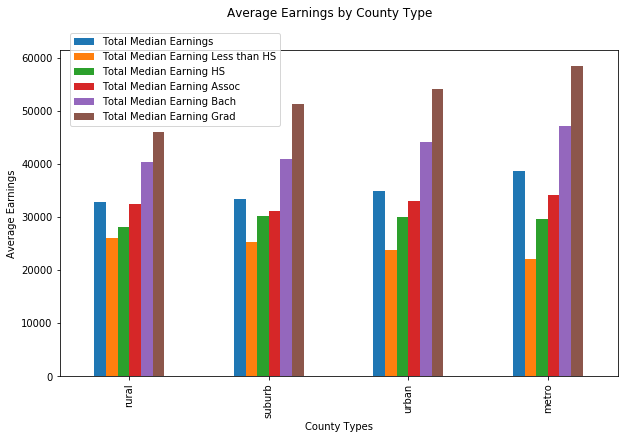

In [32]:
# Bar Chart of the Average Earnings by County type
county_groups_chart = county_groups_totals.plot(kind="bar", figsize=(10,6)).legend(loc='center left', bbox_to_anchor=(.01, .91))

plt.suptitle("Average Earnings by County Type")
plt.xlabel("County Types")
plt.ylabel("Average Earnings")
plt.savefig("average_earnings_county_type_bar.png")
plt.show()
#plt.tight_layout()


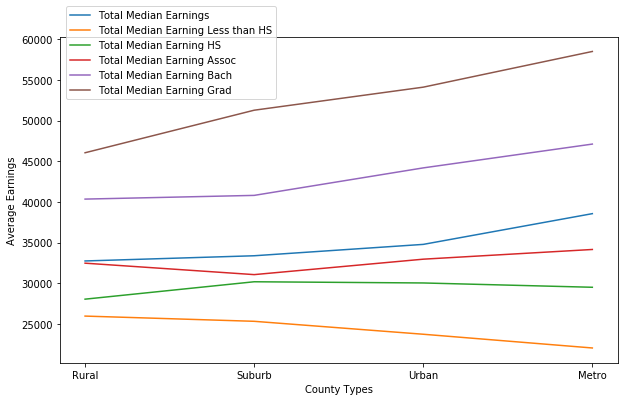

In [33]:
# Create line chart of the county group earnings
county_groups_chart = county_groups_totals.plot(kind="line", 
                                                figsize=(10,6)).legend(loc='center left', bbox_to_anchor=(.0019, .95))


plt.title=("Average Earnings by County")
labels = ["Rural", "Suburban", "Urban", "Extra Urban"]
plt.xlabel("County Types")
plt.ylabel("Average Earnings")
plt.xticks(np.arange(4), ('Rural', 'Suburb', 'Urban', 'Metro'))
plt.savefig("average_earnings_county_type_line2.jpeg")
plt.show()
#plt.tight_layout()

In [34]:
# Store 'Lat' and 'Lng' into  locations for each of the counties 
locations = indexed_df[["Latitude", "Longitude"]].astype(float)

# Convert County population Rate to float and store
earnings = indexed_df["Total Median Earnings "].astype(float)


In [35]:
# Create a earnings Heatmap layer
fig = gmaps.figure(map_type = 'HYBRID')
#fig = gmaps.figure(map_type = 'SATELLITE')
#fig = gmaps.figure(map_type = 'TERRAIN')
heat_layer_earnings = gmaps.heatmap_layer(locations, weights=earnings, 
                                 dissipating=True, max_intensity=100,
                                 point_radius = 5)

#heat_layer.gradient = ['white', 'silver', 'gray']
fig.add_layer(heat_layer_earnings)

fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
# Store 'Lat' and 'Lng' into  locations for each of the counties 
locations = earnings_df[["Latitude", "Longitude"]].astype(float)

# Convert the less than high school mean income to float and store
earnings_lths = earnings_df["Total Median Earning Less than HS"].astype(float)


In [37]:
# Create a poverty Heatmap layer
#fig = gmaps.figure(map_type = 'HYBRID')
#fig = gmaps.figure(map_type = 'SATELLITE')
fig = gmaps.figure(map_type = 'TERRAIN')
heat_layer_lth = gmaps.heatmap_layer(locations, weights=earnings_lths, 
                                 dissipating=True, max_intensity=100,
                                 point_radius = 5)

heat_layer_lth.gradient = ['white', 'yellow', 'red']
fig.add_layer(heat_layer_lth)
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Store 'Lat' and 'Lng' into  locations for each of the counties 
locations = indexed_df[["Latitude", "Longitude"]].astype(float)

# Convert County population Rate to float and store
earnings_hs = indexed_df["Total Median Earning HS"].astype(float)


In [39]:
# Create a poverty Heatmap layer
#fig = gmaps.figure(map_type = 'HYBRID')
#fig = gmaps.figure(map_type = 'SATELLITE')
fig = gmaps.figure(map_type = 'TERRAIN')
heat_layer_hs = gmaps.heatmap_layer(locations, weights=earnings_hs, 
                                 dissipating=True, max_intensity=300,
                                 point_radius = 7)

fig.add_layer(heat_layer_hs)
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Store 'Lat' and 'Lng' into  locations for each of the counties 
locations = indexed_df[["Latitude", "Longitude"]].astype(float)

# Convert County population Rate to float and store
earnings_as = indexed_df["Total Median Earning Assoc"].astype(float)


In [41]:
# Create a poverty Heatmap layer
#fig = gmaps.figure(map_type = 'HYBRID')
#fig = gmaps.figure(map_type = 'SATELLITE')
fig = gmaps.figure(map_type = 'TERRAIN')
heat_layer_as = gmaps.heatmap_layer(locations, weights=earnings_as, 
                                 dissipating=True, max_intensity=100,
                                 point_radius = 5)

#heat_layer.gradient = ['white', 'silver', 'gray']
fig.add_layer(heat_layer_as)

fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
# Store 'Lat' and 'Lng' into  locations for each of the counties 
locations = indexed_df[["Latitude", "Longitude"]].astype(float)

# Convert County population Rate to float and store
earnings_ba = indexed_df["Total Median Earning Bach"].astype(float)


In [43]:
# Create a poverty Heatmap layer
#fig = gmaps.figure(map_type = 'HYBRID')
#fig = gmaps.figure(map_type = 'SATELLITE')
fig = gmaps.figure(map_type = 'TERRAIN')
heat_layer_ba = gmaps.heatmap_layer(locations, weights=earnings_ba, 
                                 dissipating=True, max_intensity=100,
                                 point_radius = 5)

#heat_layer.gradient = ['white', 'silver', 'gray']
fig.add_layer(heat_layer_ba)

fig

Figure(layout=FigureLayout(height='420px'))

In [44]:
# Store 'Lat' and 'Lng' into  locations for each of the counties 
locations = earnings_df[["Latitude", "Longitude"]].astype(float)

# Convert County earnings for Graduate or Professional Degree to float and store
earnings_pd = earnings_df["Total Median Earning Grad"].astype(float)

In [45]:
# Create a poverty Heatmap layer
#fig = gmaps.figure(map_type = 'HYBRID')
fig = gmaps.figure(map_type = 'SATELLITE')
#fig = gmaps.figure(map_type = 'TERRAIN')
heat_layer_pd = gmaps.heatmap_layer(locations, weights=earnings_pd, 
                                 dissipating=True, max_intensity=100,
                                 point_radius = 4)

heat_layer_pd.gradient = ['white', 'silver', 'red']
fig.add_layer(heat_layer_pd)
fig

Figure(layout=FigureLayout(height='420px'))

In [46]:
# Create a combined map
fig = gmaps.figure()
fig.add_layer(heat_layer_hs)
fig.add_layer(heat_layer_pd)
fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
# Use pd.to_numeric() method to convert the datatype of the Amount column
census_pop_merge_df['Total Median Earning Less than HS'] = pd.to_numeric(census_pop_merge_df['Total Median Earning Less than HS'])
census_pop_merge_df.head()

,County,25+Population,Total Male Population,Total Female Population,"DNU: Total 18-24, Non-grad","DNU: M Total 18-24, Non-grad","DNU: F Total 18-24, Non-grad","DNU: Total 18-24, HS","DNU: M Total 18-24, HS","DNU: F Total 18-24, HS",...,Male Median Earning Assoc,Female Median Earning Assoc,Total Median Earning Bach,Male Median Earning Bach,Female Median Earning Bach,Total Median Earning Grad,Male Median Earning Grad,Female Median Earning Grad,Total Population,County Type
0,"Allen County, Kansas",1161,616,545,76,57,19,399,231,168,...,36058,22031.0,39116,47917.0,36612.0,52315.0,60159,47750,12519,suburb
1,"Anderson County, Kansas",517,272,245,58,13,45,169,151,18,...,30167,22178.0,37083,37849.0,27361.0,40967.0,NaN,41321,7833,rural
2,"Atchison County, Kansas",2449,1188,1261,147,93,54,668,433,235,...,39074,18268.0,42221,67500.0,40654.0,49211.0,65234,43368,16332,suburb
3,"Barber County, Kansas",319,163,156,98,65,33,86,51,35,...,47143,18750.0,40662,41250.0,40481.0,62159.0,75341,48824,4586,rural
4,"Barton County, Kansas",2287,1150,1137,344,190,154,685,372,313,...,42432,26941.0,41098,50278.0,33598.0,53445.0,55000,51394,26476,urban


In [48]:
# Use pd.to_numeric() method to convert the datatype of the Amount column
census_pop_merge_df['Total Median Earning Grad'] = pd.to_numeric(census_pop_merge_df['Total Median Earning Grad'])
census_pop_merge_df.head()

,County,25+Population,Total Male Population,Total Female Population,"DNU: Total 18-24, Non-grad","DNU: M Total 18-24, Non-grad","DNU: F Total 18-24, Non-grad","DNU: Total 18-24, HS","DNU: M Total 18-24, HS","DNU: F Total 18-24, HS",...,Male Median Earning Assoc,Female Median Earning Assoc,Total Median Earning Bach,Male Median Earning Bach,Female Median Earning Bach,Total Median Earning Grad,Male Median Earning Grad,Female Median Earning Grad,Total Population,County Type
0,"Allen County, Kansas",1161,616,545,76,57,19,399,231,168,...,36058,22031.0,39116,47917.0,36612.0,52315.0,60159,47750,12519,suburb
1,"Anderson County, Kansas",517,272,245,58,13,45,169,151,18,...,30167,22178.0,37083,37849.0,27361.0,40967.0,NaN,41321,7833,rural
2,"Atchison County, Kansas",2449,1188,1261,147,93,54,668,433,235,...,39074,18268.0,42221,67500.0,40654.0,49211.0,65234,43368,16332,suburb
3,"Barber County, Kansas",319,163,156,98,65,33,86,51,35,...,47143,18750.0,40662,41250.0,40481.0,62159.0,75341,48824,4586,rural
4,"Barton County, Kansas",2287,1150,1137,344,190,154,685,372,313,...,42432,26941.0,41098,50278.0,33598.0,53445.0,55000,51394,26476,urban


In [49]:
by_county = totalcountypop_df.groupby('County')
by_county
#Color Scheme for the rest of the analysis
#http://www.discoveryplayground.com/computer-programming-for-kids/rgb-colors/
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080', 'Green':'#008000', 'Sienna': '#A0522D'}

#Separate dataframes by city categories
rural = census_pop_merge_df[census_pop_merge_df['County Type'] == 'rural']
suburb = census_pop_merge_df[census_pop_merge_df['County Type'] == 'suburb']
urban = census_pop_merge_df[census_pop_merge_df['County Type'] == 'urban']
metro = census_pop_merge_df[census_pop_merge_df['County Type'] == 'metro']

area_color = {'rural': color_scheme['Gold'], 
              'suburb': color_scheme['Light Sky Blue'], 
              'urban': color_scheme['Light Coral'], 
              'metro': color_scheme['Green']
             }

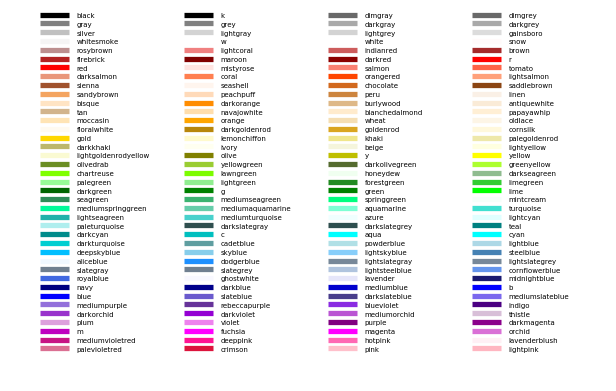

In [50]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
from __future__ import division
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(8, 5))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=colors[name], linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()
   

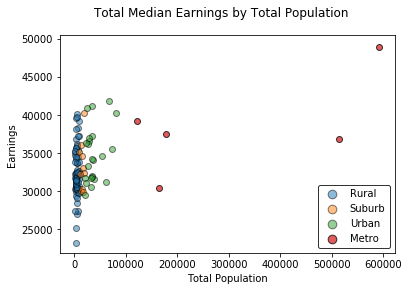

In [51]:
#Scatter plots for each city type
plt.scatter(rural['Total Population'], rural['Total Median Earnings '], 
            #s = rural['Total Median Earning Bach'], color = area_color['rural'], 
            edgecolor = 'black', label = 'Rural', alpha = .5)

plt.scatter(suburb['Total Population'], suburb['Total Median Earnings '], 
            #s = suburban['Total Median Earning Bach'], color = area_color['suburban'], 
            edgecolor = 'black', label = 'Suburb', alpha = .5)

plt.scatter(urban['Total Population'], urban['Total Median Earnings '], 
            #s = urban['Total Median Earning Bach'], color = area_color['urban'], 
            edgecolor = 'black', label = 'Urban', alpha = .5)

plt.scatter(metro['Total Population'], metro['Total Median Earnings '], 
            #s = extra_urban['2017'], color = area_color['extra urban'], 
            edgecolor = 'black', label = 'Metro', alpha = .75)

#Printing scatter plot
plt.suptitle("Total Median Earnings by Total Population")
#plt.title('Note : Size of Bubble Corresponds to Population Size')
plt.xlabel("Total Population")
plt.ylabel("Earnings")


#Create legend for scatter plot
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.legendHandles[3]._sizes = [75]
#plt.savefig("census_project_scat_earningstopop.png")
plt.show()

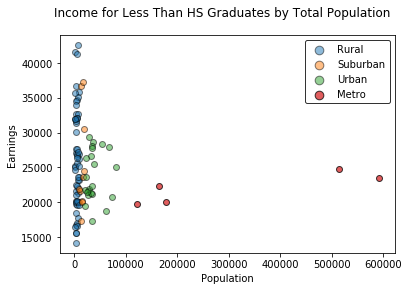

In [52]:
#Scatter plots for each city type
plt.scatter(rural['Total Population'], rural['Total Median Earning Less than HS'], 
            #s = rural['Total Median Earning Bach'], color = area_color['rural'], 
            edgecolor = 'black', label = 'Rural', alpha = .5)

plt.scatter(suburb['Total Population'], suburb['Total Median Earning Less than HS'], 
            #s = suburban['Total Median Earning Bach'], color = area_color['suburban'], 
            edgecolor = 'black', label = 'Suburban', alpha = .5)

plt.scatter(urban['Total Population'], urban['Total Median Earning Less than HS'], 
            #s = urban['Total Median Earning Bach'], color = area_color['urban'], 
            edgecolor = 'black', label = 'Urban', alpha = .5)

plt.scatter(metro['Total Population'], metro['Total Median Earning Less than HS'], 
            #s = extra_urban['2017'], color = area_color['extra urban'], 
            edgecolor = 'black', label = 'Metro', alpha = .75)

#Printing scatter plot
plt.suptitle('Income for Less Than HS Graduates by Total Population')
#plt.title('Note : Size of Bubble Corresponds to Population Size')
plt.xlabel('Population')
plt.ylabel('Earnings')


#Create legend for scatter plot
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.legendHandles[3]._sizes = [75]
#plt.savefig("census_project_scat_lths_earningstopop.png")
plt.show()

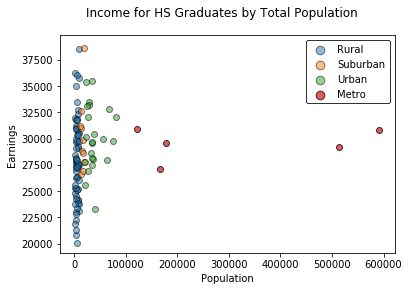

In [53]:
#Scatter plots for each city type
plt.scatter(rural['Total Population'], rural['Total Median Earning HS'], 
            #s = rural['Total Median Earning Bach'], color = area_color['rural'], 
            edgecolor = 'black', label = 'Rural', alpha = .5)

plt.scatter(suburb['Total Population'], suburb['Total Median Earning HS'], 
            #s = suburban['Total Median Earning Bach'], color = area_color['suburban'], 
            edgecolor = 'black', label = 'Suburban', alpha = .5)

plt.scatter(urban['Total Population'], urban['Total Median Earning HS'], 
            #s = urban['Total Median Earning Bach'], color = area_color['urban'], 
            edgecolor = 'black', label = 'Urban', alpha = .5)

plt.scatter(metro['Total Population'], metro['Total Median Earning HS'], 
            #s = extra_urban['2017'], color = area_color['extra urban'], 
            edgecolor = 'black', label = 'Metro', alpha = .75)

#Printing scatter plot
plt.suptitle('Income for HS Graduates by Total Population')
#plt.title('Note : Size of Bubble Corresponds to Population Size')
plt.xlabel('Population')
plt.ylabel('Earnings')


#Create legend for scatter plot
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.legendHandles[3]._sizes = [75]
#plt.savefig("census_project_scat_hs_earningstopop.png")
plt.show()

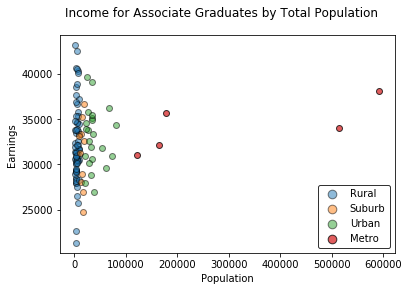

In [54]:
#Scatter plots for each city type
plt.scatter(rural['Total Population'], rural['Total Median Earning Assoc'], 
            #s = rural['Total Median Earning Bach'], color = area_color['rural'], 
            edgecolor = 'black', label = 'Rural', alpha = .5)

plt.scatter(suburb['Total Population'], suburb['Total Median Earning Assoc'], 
            #s = suburban['Total Median Earning Bach'], color = area_color['suburban'], 
            edgecolor = 'black', label = 'Suburb', alpha = .5)

plt.scatter(urban['Total Population'], urban['Total Median Earning Assoc'], 
            #s = urban['Total Median Earning Bach'], color = area_color['urban'], 
            edgecolor = 'black', label = 'Urban', alpha = .5)

plt.scatter(metro['Total Population'], metro['Total Median Earning Assoc'], 
            #s = extra_urban['2017'], color = area_color['extra urban'], 
            edgecolor = 'black', label = 'Metro', alpha = .75)

#Printing scatter plot
plt.suptitle('Income for Associate Graduates by Total Population')
#plt.title('Note : Size of Bubble Corresponds to Population Size')
plt.xlabel('Population')
plt.ylabel('Earnings')


#Create legend for scatter plot
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.legendHandles[3]._sizes = [75]
#plt.savefig("census_project_scat_assoc_earningstopop.png")
plt.show()

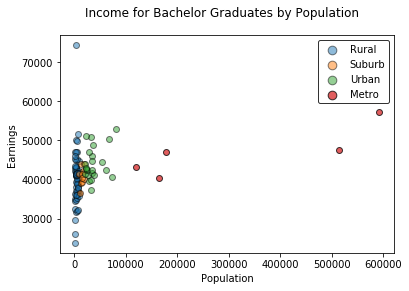

In [55]:
#Scatter plots for each city type
plt.scatter(rural['Total Population'], rural['Total Median Earning Bach'], 
            #s = rural['Total Median Earning Bach'], color = area_color['rural'], 
            edgecolor = 'black', label = 'Rural', alpha = .5)

plt.scatter(suburb['Total Population'], suburb['Total Median Earning Bach'], 
            #s = suburban['Total Median Earning Bach'], color = area_color['suburban'], 
            edgecolor = 'black', label = 'Suburb', alpha = .5)

plt.scatter(urban['Total Population'], urban['Total Median Earning Bach'], 
            #s = urban['Total Median Earning Bach'], color = area_color['urban'], 
            edgecolor = 'black', label = 'Urban', alpha = .5)

plt.scatter(metro['Total Population'], metro['Total Median Earning Bach'], 
            #s = extra_urban['2017'], color = area_color['extra urban'], 
            edgecolor = 'black', label = 'Metro', alpha = .75)

#Printing scatter plot
plt.suptitle('Income for Bachelor Graduates by Population')
#plt.title('Note : Size of Bubble Corresponds to Population Size')
plt.xlabel('Population')
plt.ylabel('Earnings')


#Create legend for scatter plot
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.legendHandles[3]._sizes = [75]
#plt.savefig("census_project_scat_bs_earningstopop.png")
plt.show()

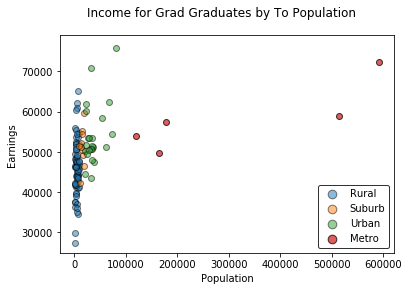

In [56]:
#Scatter plots for each city type
plt.scatter(rural['Total Population'], rural['Total Median Earning Grad'], 
            #s = rural['Total Median Earning Bach'], color = area_color['rural'], 
            edgecolor = 'black', label = 'Rural', alpha = .5)

plt.scatter(suburb['Total Population'], suburb['Total Median Earning Grad'], 
            #s = suburban['Total Median Earning Bach'], color = area_color['suburban'], 
            edgecolor = 'black', label = 'Suburb', alpha = .5)

plt.scatter(urban['Total Population'], urban['Total Median Earning Grad'], 
            #s = urban['Total Median Earning Bach'], color = area_color['urban'], 
            edgecolor = 'black', label = 'Urban', alpha = .5)

plt.scatter(metro['Total Population'], metro['Total Median Earning Grad'], 
            #s = extra_urban['2017'], color = area_color['extra urban'], 
            edgecolor = 'black', label = 'Metro', alpha = .75)

#Printing scatter plot
plt.suptitle('Income for Grad Graduates by To Population')
#plt.title('Note : Size of Bubble Corresponds to Population Size')
plt.xlabel('Population')
plt.ylabel('Earnings')


#Create legend for scatter plot
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.legendHandles[3]._sizes = [75]
#plt.savefig("census_project_scat_grad_earningstopop.png")
plt.show()